In [82]:
%run init.ipynb

# Apagador quântico

## Obtendo a informação de caminho
O princípio de complementariedade de Bohr diz que não podemos observar o comportamento ondulatório do quanton (as oscilações no gráfico das probabilidades para o interferômetro de Mach-Zehnder (IMZ)) e saber seu caminho usando um único arranjo experimental. Se sabemos por qual caminho o quanton rumou, temos que $Pr(D_{0})=Pr(D_{1})=1/2\ \forall \phi$. Para observarmos o padrão de interferência com máxima visibilidade, não podemos ter nenhuma informação de caminho. 

Podemos obter informação de caminho fazendo uma medida (forte ou fraca) em um dos caminhos, depois do primeiro divisor de feixes. Podemos obter informação de caminho também emaranhando o quanton com outro quanton auxiliar (_emaranhamento_ parcial seria equivalente à menor intensidade das medidas!?). Por agora, vamos seguir essa última possibilidade aqui. 

OBS: Seria interessante fazer essas medidas fracas usando o protocolo do Marcos. Pode ser uma ideia para "completar" o paper... Temos que ver ainda como implementar isso no IBMQ...

Vamos utilizar o interferômetro de Mach-Zehnder agora com o 1º divisor de feixes trocado por um __divisor de feixes polarizador (DFP)__. 
<img src = 'fig_dfp.jpeg' width = '300'>
O DFP deixa passar fótons com uma certa polarização, digamos horizontal, e reflete fótons com polarização ortogonal à 1ª, que seria vertical neste caso. Em equações
\begin{align}
& U_{dfp}|H\rangle|0\rangle = |H\rangle|0\rangle, U_{dfp}|V\rangle|0\rangle = i|V\rangle|1\rangle, \\
& U_{dfp}|H\rangle|1\rangle = i|H\rangle|0\rangle, U_{dfp}|V\rangle|1\rangle = |V\rangle|1\rangle.
\end{align}
Veja a figura abaixo.
<img src='fig_dfp.png' width = '300'>
__OBS.__ Se teria que ir mais a fundo para verificar se a ação do DFP é de fato essa.

Então, para estados de superposição da polarização, o DFP pode criar emaranhamento entre os graus de liberdade de polarização e modos espaciais do fóton:
\begin{align}
U_{dfp}|\psi\rangle|0\rangle & = U_{dfp}(c_{H}|H\rangle+c_{V}|V\rangle)|0\rangle  = c_{H}U_{dfp}|H\rangle|0\rangle+c_{V}U_{dfp}|V\rangle|0\rangle \\
& = c_{H}|H\rangle|0\rangle + ic_{V}|V\rangle|1\rangle.
\end{align}

<img src = 'fig_imz_dfp.png' width = '300'>

Vemos com isso que podemos acessar a informação sobre por qual caminho o fóton seguiu através desse seu outro grau de liberdade, a sua polarização. Isso nos indica que a visibilidade do padrão de interferência, no IMZ (veja a figura acima), deve ser nula. Vamos fazer as contas:
\begin{align}
|\psi_{0}\rangle &= (c_{H}|H\rangle + c_{V}|V\rangle)|0\rangle, \\
|\psi_{1}\rangle &= U_{dfp}|\psi_{0}\rangle = c_{H}|H\rangle|0\rangle + ic_{V}|V\rangle|1\rangle, \\
|\psi_{2}\rangle &= U_{e}|\psi_{1}\rangle =  ic_{H}|H\rangle|1\rangle + iic_{V}|V\rangle|0\rangle =  ic_{H}|H\rangle|1\rangle - c_{V}|V\rangle|0\rangle, \\
|\psi_{3}\rangle &= U_{\phi}|\psi_{2}\rangle =  ie^{i\phi}c_{H}|H\rangle|1\rangle - c_{V}|V\rangle|0\rangle, \\
|\psi_{4}\rangle &= U_{df}|\psi_{3}\rangle =  ie^{i\phi}c_{H}|H\rangle(i|0\rangle+|1\rangle)/\sqrt{2} - c_{V}|V\rangle(|0\rangle+i|1\rangle)/\sqrt{2}.
\end{align}

O operador densidade correspondente é
\begin{align}
\rho_{4} &= |\psi_{4}\rangle\langle\psi_{4}| \\
& = |c_{H}|^{2}|H\rangle\langle H|(i|0\rangle+|1\rangle)(-i\langle 0|+\langle 1|)/2 + |c_{V}|^{2}|V\rangle\langle V|(|0\rangle+i|1\rangle)(\langle 0|-i\langle 1|)/2 \\
& + \big(A|H\rangle\langle V| + t.c.\big).
\end{align}
Se tomamos o traço parcial sobre o grau de liberdade de polarização, obteremos o operador densidade reduzido do grau de liberdade espacial:
\begin{align}
\rho_{4}^{e} &= Tr_{p}(\rho_{4}) \\
& = |c_{H}|^{2}(i|0\rangle+|1\rangle)(-i\langle 0|+\langle 1|)/2 + |c_{V}|^{2}(|0\rangle+i|1\rangle)(\langle 0|-i\langle 1|)/2 \\
&= ((|c_{H}|^{2}+|c_{V}|^{2})/2)|0\rangle\langle 0| + E|1\rangle\langle 1| + \big(C|0\rangle\langle 1|+ t.c.\big) \\
&= (1/2)|0\rangle\langle 0| + E|1\rangle\langle 1| + \big(C|0\rangle\langle 1|+ t.c.\big)
\end{align}

A probabilidade que nos interessa é então
$$Pr(0) = \langle 0|\rho_{4}^{e}|0\rangle = 1/2.$$
Por conseguinte, $V=0$. 

Note que isso ocorre para qualquer que seja a quantidade de emaranhamento criado. Esse resultado é esperado pois mesmo que o estado de entrada seja $|\psi_{0}\rangle=|H,0\rangle$ saberemos que o caminho tomado logo depois do DFP é o horizontal. Se houver superposição inicial de polarização, não conhecemos o caminho, por causa da superposição quântica, mas esta informação está disponível, uma vez que podemos descobrir esse caminho colocando um DFP entre o DFP existente e o espelho.

### Implementação no IBMQ

Primeiramente, temos que obter a matriz para a transformação unitária implementada pelo DFP. Para um estado qualquer, teremos
\begin{align}
U_{dfp}|\Psi\rangle & = c_{H0}U_{dfp}|H0\rangle + c_{H1}U_{dfp}|H1\rangle + c_{V0}U_{dfp}|V0\rangle + c_{V1}U_{dfp}|V1\rangle \\
& = c_{H0}|H0\rangle + ic_{H1}|H0\rangle + ic_{V0}|V1\rangle + c_{V1}|V1\rangle \\
& = \begin{bmatrix} c_{H0}+ ic_{H1} \\ 0 \\ 0 \\ ic_{V0}+c_{V1} \end{bmatrix} = U_{dfp}\begin{bmatrix} c_{H0} \\ c_{H1} \\ c_{V0} \\ c_{V1} \end{bmatrix} = \begin{bmatrix}1&i&0&0  \\ 0&0&0&0 \\ 0&0&0&0 \\ 0&0&i&1 \\  \end{bmatrix}\begin{bmatrix} c_{H0} \\ c_{H1} \\ c_{V0} \\ c_{V1} \end{bmatrix}.
\end{align}

Mas essa matriz, obviamente, não é unitária. Mas, com a ajuda do código abaixo, vemos que o DFP é representado pela seguinte matriz unitária:
$$U_{dfp} \doteq \frac{1}{\sqrt{2}}\begin{bmatrix} 1&i&0&0 \\ i&1&0&0 \\ 0&0&1&i \\ 0&0&i&1 \end{bmatrix} = C_{U_{df}}^{12}(X\otimes I)C_{U_{df}}^{12}(X\otimes I) = (X\otimes I)C_{U_{df}}^{12}(X\otimes I)C_{U_{df}}^{12} = I\otimes U_{df},$$
com
$$C_{U_{df}}^{12} = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U_{df}$$
e 
$$U_{df} \doteq \frac{1}{\sqrt{2}}\begin{bmatrix}1&i \\ i&1 \end{bmatrix} .$$

OBS: Vale observar que $\bar{C}_{U_{df}}^{12} = (X\otimes I)C_{U_{df}}^{12}(X\otimes I)$ é igual a $C_{U_{df}}^{12}$ com ação ocorrendo somente se o estado do controle for $|0\rangle$:
$$\bar{C}_{U_{df}}^{12} = (X\otimes I)C_{U_{df}}^{12}(X\otimes I) = |1\rangle\langle 1|\otimes I + |0\rangle\langle 0|\otimes U_{df}.$$

OBS: A representação matricial é feita na base padrão 
$$\{|H0\rangle,|H1\rangle,|V0\rangle,|V1\rangle\}=:\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\},$$
em que definimos
$$|0\rangle:=|H\rangle \text{ e } |1\rangle:=|V\rangle.$$

OBS: Vale notar que
\begin{equation}
U_{dfp}|\Psi\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1&i&0&0  \\ i&1&0&0 \\ 0&0&1&i \\ 0&0&i&1 \\  \end{bmatrix}\begin{bmatrix} c_{H0} \\ c_{H1} \\ c_{V0} \\ c_{V1} \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} c_{H0}+ ic_{H1} \\ ic_{H0} + c_{H1} \\ c_{V0}+ic_{V1} \\ ic_{V0}+c_{V1} \end{bmatrix}.
\end{equation}
__OBS:__ Depois de "resultados errados" na simulação dos circuitos quânticos, percebi que essa matriz unitária não implementa a ação que queremos implementar. Por Exemplo
$$U_{dfp}|00\rangle = |0+\rangle \ne |00\rangle.$$
Por isso, abaixo vamos fazer outra proposta, que também é mais realística do ponto de vista físico.

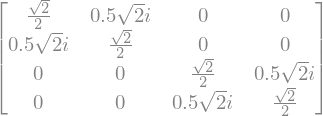

In [83]:
Udfp = (1/sqrt(2))*Matrix([[1,1j,0,0],[1j,1,0,0],[0,0,1,1j],[0,0,1j,1]]); Udfp

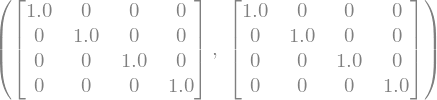

In [84]:
Udfp*conjugate(Udfp), conjugate(Udfp)*Udfp # ok!

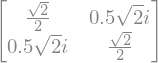

In [85]:
Udf = (1/sqrt(2))*Matrix([[1,1j],[1j,1]]); Udf

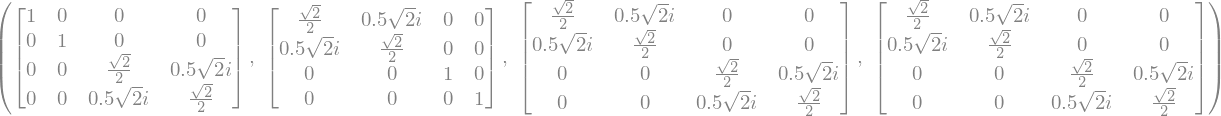

In [86]:
X = Matrix([[0,1],[1,0]]); C_Udf = tp(proj(cb(2,0)),id(2)) + tp(proj(cb(2,1)),Udf)
C_Udf, tp(X,id(2))*C_Udf*tp(X,id(2)), tp(X,id(2))*C_Udf*tp(X,id(2))*C_Udf, C_Udf*tp(X,id(2))*C_Udf*tp(X,id(2))

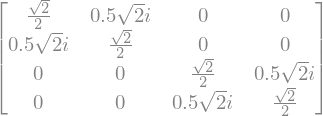

In [87]:
C_Udf*tp(X,id(2))*C_Udf*tp(X,id(2))

### Como implementar $C_{U_{df}}^{12}=|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U_{df}$?
Para
$$U = e^{i\alpha}AXBXC$$
com 
$$ABC = I,$$
pode-se escrever
$$C_{U}^{12} = \big(P(\alpha)\otimes A\big)C_{X}^{12}\big(I\otimes B\big)C_{X}^{12}\big(I\otimes C\big).$$
Verificação:
\begin{align}
& \big(P(\alpha)\otimes A\big)C_{X}^{12}\big(I\otimes B\big)C_{X}^{12}\big(I\otimes C\big) \\
& = \big(P(\alpha)\otimes A\big)\big(|0\rangle\langle 0|\otimes I+|1\rangle\langle 1|\otimes X\big)\big(I\otimes B\big)C_{X}^{12}\big(I\otimes C\big) \\
&  = \big(|0\rangle\langle 0|\otimes AB+e^{i\alpha}|1\rangle\langle 1|\otimes AXB\big)\big(|0\rangle\langle 0|\otimes C+|1\rangle\langle 1|\otimes XC\big) \\
& = |0\rangle\langle 0|\otimes ABC + |1\rangle\langle 1|\otimes e^{i\alpha}AXBXC.
\end{align}

Com o código abaixo verifica-se que
$$U_{df} = U(\pi,-\pi/2,\pi/2)SXHXS.$$
No entanto, para $A=U(\pi,-\pi/2,\pi/2)S$, $B=H$ e $C=S$ temos $ABC=U_{df}^{\dagger}\ne I$. Outra possibilidade? 

Por sorte, uma __U controlada__ geral está pronta no IBMQ (https://qiskit.org/documentation/stubs/qiskit.circuit.library.CUGate.html#qiskit.circuit.library.CUGate). Essa porta tem 4 parâmetros
$$CU(\theta,\phi,\lambda,\gamma) = |0\rangle\langle 0 |\otimes I + |1\rangle\langle 1|\otimes e^{i\gamma}U(\theta,\phi,\lambda).$$
Na aula passada, vimos que $U_{df} \equiv U(\theta=\pi/2, \phi = \pi/2, \lambda = -\pi/2)$.

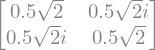

In [88]:
def P(al):
    return Matrix([[1,0],[0,cos(al)+1j*sin(al)]])
S = Matrix([[1,0],[0,1j]]); Sd = Matrix([[1,0],[0,-1j]]); H = (1/sqrt(2))*Matrix([[1,1],[1,-1]])
X = Matrix([[0,1],[1,0]]); Y = Matrix([[0,-1j],[1j,0]]); Z = Matrix([[1,0],[0,-1]])
def U(th,ph,lb):
    return Matrix([[cos(th/2),-(cos(lb)+1j*sin(lb))*sin(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2),cos(th/2)]])
th, ph, lb = symbols('theta phi lambda'); U(pi,-pi/2,pi/2)*S*X*H*X*S

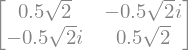

In [93]:
A = U(pi,-pi/2,pi/2)*S; B = H; C = S; A*B*C  # = Udf^dagger != I

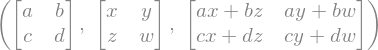

In [90]:
a,b,c,d, x, y, z, w = symbols('a,b,c,d, x, y, z, w')
A = Matrix([[a,b],[c,d]]); B = Matrix([[x,y],[z,w]]); A, B, A*B

In [91]:
a = -1/sqrt(2); b = 1j/sqrt(2); c = b; d = a # para trocar o sinal dos elementos da diagonal principal
solve([a*x+b*z+a, a*y+b*w-b, c*x+d*z-c, c*y+d*w+d], [x,y,z,w])

### Obtendo informação de caminho no IBMQ
Então, se preparamos dois qubits, o qubit 0 representanto a polarização e o qubit 1 representando o modo espacial do fóton, e substituímos o primeiro divisor de feixes do inteferômetro de Mach-Zehnder por um divisor de feixes polarizado, teremos acesso à informação de caminho e a visibilidade do padrão de interferência será nula.

<img src = 'fig_qc_dfp.png' width = '400'>

In [94]:
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2021-12-06 17:52:08,503: Credentials are already in use. The existing account in the session will be replaced.


In [95]:
def state_prep(th, ph):
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name = 'prep')
    qc.u(th, ph, 0, qr[0])
    qc.u(th, ph, 0, qr[1])
    return qc

In [164]:
def qc_dfp():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
    '''qc.x(qr[1])
    qc.cu(math.pi/2, math.pi/2, -math.pi/2, 0.0, qr[1], qr[0]) # Udf controlada
    qc.x(qr[1])
    qc.cu(math.pi/2, math.pi/2, -math.pi/2, 0.0, qr[1], qr[0])'''
    qc.cu(math.pi, math.pi/2, -math.pi/2, 0.0, qr[0], qr[1])
    return qc
qc_dfp_ = qc_dfp(); qc_dfp_.draw()

q30661_0: ─────────■─────────
          ┌────────┴────────┐
q30661_1: ┤ U(π,π/2,-π/2,0) ├
          └─────────────────┘

In [165]:
###### Para ver a matriz unitário implementada por um certo circuito quântico ##########
backend = Aer.get_backend('unitary_simulator'); qc_dfp_ = qc_dfp(); job = execute(qc_dfp_, backend)
result = job.result(); print(result.get_unitary(qc_dfp_, decimals=3))
# agora tá certo, mas ao contrário em relação aos qubits...

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+1.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]]


In [107]:
qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
#qc.cx(qr[0],qr[1]) # Sai a matrix para C21
qc.cx(qr[1],qr[0]) # Sai a matrix para C12 
job = execute(qc, backend); result = job.result(); print(result.get_unitary(qc, decimals=3))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [109]:
qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
qc.h(qr[0])
#qc.cx(qr[0], qr[1]) # sai o estado certo, |00>+|11>
qc.cx(qr[1], qr[0]) # sai |+0>
qstc = state_tomography_circuits(qc, [qr[0],qr[1]])
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
rho

array([[0.50227389+0.00000000e+00j, 0.49742805-4.50612693e-03j,
        0.00619025+2.23768839e-03j, 0.00119854+6.76346475e-04j],
       [0.49742805+4.50612693e-03j, 0.49598394+0.00000000e+00j,
        0.0056165 +7.05293450e-04j, 0.00065513-9.01270228e-04j],
       [0.00619025-2.23768839e-03j, 0.0056165 -7.05293450e-04j,
        0.00090007+0.00000000e+00j, 0.00084367-9.74141496e-06j],
       [0.00119854-6.76346475e-04j, 0.00065513+9.01270228e-04j,
        0.00084367+9.74141496e-06j, 0.0008421 +0.00000000e+00j]])

In [ ]:
# Verificação da Udf controlada
qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
qc.x(qr[1])
qc.cu(math.pi/2, math.pi/2, -math.pi/2, 0.0, qr[1], qr[0]) # a sequência é target depois control
qc.x(qr[1])
job = execute(qc, backend); result = job.result(); print(result.get_unitary(qc, decimals=3))

In [ ]:
qc.draw()

In [ ]:
# Verificação da Udf controlada
qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
qc.cx(qr[1], qr[0]) # a sequência é target depois control
job = execute(qc, backend); result = job.result(); print(result.get_unitary(qc, decimals=3))

In [112]:
def qc_mzi_dfp(ph): # quantum circuit for the Mach-Zehnder interferometer com DFP
    qr = QuantumRegister(2); qc = QuantumCircuit(qr)
    state_prep_ = state_prep(0, 0); qc.append(state_prep_, [qr[0],qr[1]]) # estado prep
    qc_dfp_ = qc_dfp(); qc.append(qc_dfp_, [qr[0],qr[1]]) # DFP
    qc.z(qr[1]); qc.y(qr[1]) # espelho
    qc.p(ph, qr[1]); # fase
    qc.s(qr[1]); qc.h(qr[1]); qc.s(qr[1]) # DF
    return qc
qcmzi = qc_mzi_dfp(math.pi/8); qcmzi.draw()

┌───────┐┌──────┐                                   
q24467_0: ┤0      ├┤0     ├───────────────────────────────────
          │  prep ││  DFP │┌───┐┌───┐┌────────┐┌───┐┌───┐┌───┐
q24467_1: ┤1      ├┤1     ├┤ Z ├┤ Y ├┤ P(π/8) ├┤ S ├┤ H ├┤ S ├
          └───────┘└──────┘└───┘└───┘└────────┘└───┘└───┘└───┘

In [113]:
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph)#; ph
d = ph.shape[0]; PD0teo = np.zeros(d); PD0sim = np.zeros(d); PD0exp = np.zeros(d)
for j in range(0, d):
    PD0teo[j] = 1/2 # theoretical
    qr = QuantumRegister(2); qc = QuantumCircuit(qr)
    state_prep_ = state_prep(0, 0); qc.append(state_prep_, [qr[0],qr[1]]) # state preparation (estado |00>)
    qc_mzi_dfp_ = qc_mzi_dfp(ph[j]); qc.append(qc_mzi_dfp_, [qr[0],qr[1]]) # apply sim mzip 
    qstc = state_tomography_circuits(qc, qr[1]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0sim[j] = rho[0,0].real
    #print(rho[0,0].real)
    # 1º fiz as simulações, só depois adicionei o código para os experimentos
    '''job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0exp[j] = rho[0,0].real'''

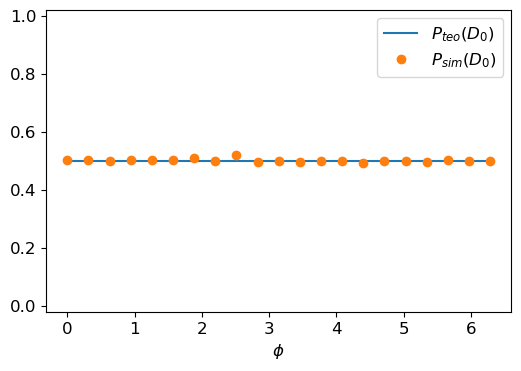

In [114]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, PD0teo, label = r'$P_{teo}(D_{0})$')
plt.plot(ph, PD0sim, 'o', label = r'$P_{sim}(D_{0})$')
#plt.plot(ph, PD0exp, '*', label = r'$P_{exp}(D_{0})$')
plt.legend(); plt.xlabel(r'$\phi$'); plt.ylim(-0.02,1.02); plt.show()

## Apagando a informação de caminho

Vamos considerar dois fótons emaranhados por __conversão paramétrica descendente__. O fóton B é enviado para o modo espacial horizontal do IMZ com DFP. Assim, o estado inicial é
$$|\psi_{0}\rangle = \frac{1}{\sqrt{2}}\big(|HV\rangle_{AB}+|VH\rangle_{AB}\big)|0\rangle_{B}.$$
O modo espacial do fóton A não importa por agora.
Aplicando os elementos do IMZ com DFP, obteremos
\begin{align}
|\psi_{1}\rangle & = U_{dfp}|\psi_{0}\rangle = \frac{1}{\sqrt{2}}\big(|H\rangle_{A}U_{dfp}|V0\rangle_{BB}+|V\rangle_{A}U_{dfp}|H0\rangle_{BB}\big) \\
&  = \frac{1}{\sqrt{2}}\big(|H\rangle_{A}i|V1\rangle_{BB}+|V\rangle_{A}|H0\rangle_{BB}\big), \\
|\psi_{2}\rangle & = U_{e}|\psi_{1}\rangle  = \frac{1}{\sqrt{2}}\big(ii|HV0\rangle_{ABB}+i|VH1\rangle_{ABB}\big), \\
|\psi_{3}\rangle & = U_{\phi}|\psi_{2}\rangle  = \frac{1}{\sqrt{2}}\big(-|HV0\rangle_{ABB}+ie^{i\phi}|VH1\rangle_{ABB}\big), \\
|\psi_{4}\rangle & = U_{df}|\psi_{3}\rangle  = \frac{1}{\sqrt{2}}\big(-|HV\rangle_{AB}(|0\rangle_{B}+i|1\rangle_{B})/\sqrt{2}+ie^{i\phi}|VH\rangle_{AB}(i|0\rangle_{B}+|1\rangle_{B})/\sqrt{2}\big) \\
& = \frac{1}{2}\Big(-\big(|HV\rangle_{AB}+e^{i\phi}|VH\rangle_{AB}\big)|0\rangle_{B} -i\big(|HV\rangle_{AB}-e^{i\phi}|VH\rangle_{AB}\big)|1\rangle_{B}\Big).
\end{align}

Para apagar essa informação, utilizamos uma __placa de quarto de onda__ (PQO), que atua como segue
$$U_{pqo}|H\rangle = (|H\rangle+i|V\rangle)/\sqrt{2}=|\oplus\rangle \text{ e } U_{pqo}|V\rangle = (|H\rangle-i|V\rangle)/\sqrt{2}=|\ominus\rangle.$$
Ou seja 
$$U_{pqo} = SH.$$
Aplicando essa operação no fóton A, teremos
\begin{align}
|\psi_{2}''\rangle &= U_{pqo}|\psi_{2}'\rangle = \frac{1}{\sqrt{2}}\big(U_{pqo}|H\rangle|0\rangle_{AB}+iU_{pqo}|V\rangle|1\rangle_{AB}\big)|H\rangle_{B} \\
& = \frac{1}{\sqrt{2}}\big(2^{-1/2}(|H\rangle_{A}+i|V\rangle_{A})|0\rangle_{B}+i2^{-1/2}(|H\rangle_{A}-i|V\rangle_{A})|1\rangle_{B}\big)|H\rangle_{B} \\
& = \frac{1}{2}\big(|H\rangle_{A}(|0\rangle_{B}+i|1\rangle_{B}) + i|V\rangle_{A}(|0\rangle_{B}-i|1\rangle_{B})\big)|H\rangle_{B}.
\end{align}
É fácil ver que a medida de polarização de A não revela mais o caminho do fóton B, cujo estado espacial colapsa para $(|0\rangle_{B}\pm i|1\rangle_{B})/\sqrt{2}$, para medidas na base $\{|H\rangle,|V\rangle\}$ em A.

OBS. Seria interessante considerar um apagador quântico __sem a PMO__. Nesse caso suponho que o apagador deveria ser implementado através de uma porta possivelmente emaranhamente, no lugar da PQO. A configuração óptica seria complicada nesse caso, o que a princípio não seria um problema para a simulação no IBMQ.

##### Exercício
Para a montagem experimental da última figura, com a PMO no caminho verticar (entre o DFP e o espelho), obtenha a sequência de estados e a probabilidade $Pr(D_{0})$.

### Experimento da escolha adiada de Wheeler
A observação intrigante de Wheeler, e que vem sendo debatida até hoje (05/dez/2021), é que poderíamos escolher colocar ou não a PQO no caminho do fóton A somente depois de ter passado um tempo suficiente para o fóton B ter chegado no detector A ou no detector B. Mas, uma vez que se a PQO está presento o comportamento do fóton é tipo onda e se a PQO está ausente o comportamento do fóton é tipo partícula, essa ação futura parece afetar o passado. E aí, que me diz disso?

## Implementação do apagador quântico no IBMQ
Para preparação do estado emaranhado em polarização dos dois fótons, usamos o circuito quântico a seguir:

In [131]:
def state_prep_psip():
    qr = QuantumRegister(3); qc = QuantumCircuit(qr, name = 'prep')
    qc.h(qr[0]); qc.cx(qr[0],qr[1]); qc.x(qr[1]) # prepara psi+_01
    return qc
state_prep_psip_ = state_prep_psip(); state_prep_psip_.draw()

┌───┐          
q26132_0: ┤ H ├──■───────
          └───┘┌─┴─┐┌───┐
q26132_1: ─────┤ X ├┤ X ├
               └───┘└───┘
q26132_2: ───────────────

In [132]:
def qc_dfp():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='DFP')
    qc.cu(math.pi, math.pi/2, -math.pi/2, 0.0, qr[0], qr[1])
    return qc
qc_dfp_ = qc_dfp(); qc_dfp_.draw()

q26133_0: ─────────■─────────
          ┌────────┴────────┐
q26133_1: ┤ U(π,π/2,-π/2,0) ├
          └─────────────────┘

In [133]:
def qc_df():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='DF')
    qc.s(qr[0]); qc.h(qr[0]); qc.s(qr[0])
    return qc
qc_df_ = qc_df(); qc_df_.draw()

┌───┐┌───┐┌───┐
q26134_0: ┤ S ├┤ H ├┤ S ├
          └───┘└───┘└───┘

In [134]:
def qc_pmo():
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name='PMO')
    qc.cx(qr[1],qr[0])
    return qc
qc_pmo_ = qc_pmo(); qc_pmo_.draw()

┌───┐
q26135_0: ┤ X ├
          └─┬─┘
q26135_1: ──■──

In [135]:
def qc_pqo():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name='PQO')
    qc.h(qr[0]); qc.s(qr[0])
    return qc
qc_pqo_ = qc_pqo(); qc_pqo_.draw()

┌───┐┌───┐
q26136_0: ┤ H ├┤ S ├
          └───┘└───┘

In [143]:
def qc_apagador(ph):
    qr = QuantumRegister(3); qc = QuantumCircuit(qr)
    state_prep_psip_ = state_prep_psip(); qc.append(state_prep_psip_, [qr[0],qr[1],qr[2]])
    qc_dfp_ = qc_dfp(); qc.append(qc_dfp_, [qr[1],qr[2]]) # DFP
    qc_pmo_ = qc_pmo(); qc.append(qc_pmo_, [qr[1],qr[2]]) # PMO
    qc_pqo_ = qc_pqo(); qc.append(qc_pqo_, [qr[0]])
    qc.z(qr[2]); qc.y(qr[2]) # espelho
    qc.p(ph, qr[2]); # fase
    qc_df_ = qc_df(); qc.append(qc_df_, [qr[2]]) # DF
    return qc
qc_apagador_ = qc_apagador(math.pi/3); qc_apagador_.draw()

┌───────┐┌─────┐                                   
q26161_0: ┤0      ├┤ PQO ├───────────────────────────────────
          │       │├─────┴┐┌──────┐                          
q26161_1: ┤1 prep ├┤0     ├┤0     ├──────────────────────────
          │       ││  DFP ││  PMO │┌───┐┌───┐┌────────┐┌────┐
q26161_2: ┤2      ├┤1     ├┤1     ├┤ Z ├┤ Y ├┤ P(π/3) ├┤ DF ├
          └───────┘└──────┘└──────┘└───┘└───┘└────────┘└────┘

In [161]:
phmax = 2*math.pi; dph = phmax/20; ph = np.arange(0, phmax+dph, dph)#; ph
d = ph.shape[0]; PD0teo = np.zeros(d); PD0sim = np.zeros(d); PD0exp = np.zeros(d)
for j in range(0, d):
    PD0teo[j] = (2+math.cos(ph[j])+math.sin(ph[j]))/4 # theoretical
    qr = QuantumRegister(3); qc = QuantumCircuit(qr)
    qc_apagador_ = qc_apagador(ph[j]); qc.append(qc_apagador_, [qr[0],qr[1],qr[2]]) # apagador q
    qstc = state_tomography_circuits(qc, qr[2]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0sim[j] = rho[0,0].real
    #print(rho[0,0].real)
    # 1º fiz as simulações, só depois adicionei o código para os experimentos
    '''job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    PD0exp[j] = rho[0,0].real'''

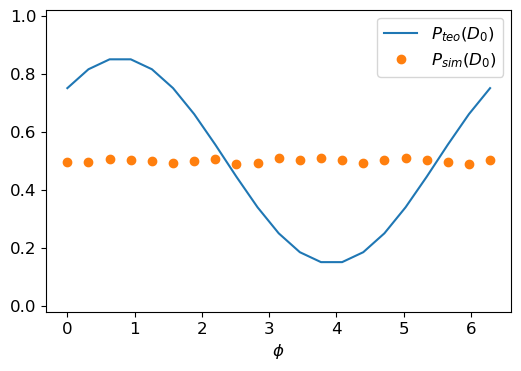

In [163]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, PD0teo, label = r'$P_{teo}(D_{0})$')
plt.plot(ph, PD0sim, 'o', label = r'$P_{sim}(D_{0})$')
#plt.plot(ph, PD0exp, '*', label = r'$P_{exp}(D_{0})$')
plt.legend(); plt.xlabel(r'$\phi$'); plt.ylim(-0.02,1.02); plt.show()

###### Contas apara verificação da funcionalidade do circuito quântico

In [159]:
H = (1/sqrt(2))*Matrix([[1,1],[1,-1]]); S = Matrix([[1,0],[0,1j]]); X = Matrix([[0,1],[1,0]])
def U(th, ph, lb):
    return Matrix([[cos(th/2),-(cos(lb)+1j*sin(lb))*sin(th/2)],
                   [(cos(ph)+1j*sin(ph))*sin(th/2),(cos(ph+lb)+1j*sin(ph+lb))*cos(th/2)]])
def dfp():
    return tp(proj(cb(2,0)), id(2)) + tp(proj(cb(2,1)), U(math.pi, math.pi/2, -math.pi/2))
def pmo():
    return tp(id(2), proj(cb(2,0))) + tp(X, proj(cb(2,1)))

In [156]:
th, ph, lb = symbols('theta phi lambda');# U(th, ph, lb)

In [160]:
psi0 = tp(tp(cb(2,0),cb(2,0)),cb(2,0))#; psi0
dfp_ = dfp(); psi1 = tp(id(2), dfp_)*psi0; psi1
pmo_ = pmo(); psi2 = tp(id(2), pmo_)*psi1; psi2

Como os estados $\big(|HV\rangle_{AB}\pm e^{i\phi}|VH\rangle_{AB}\big)/\sqrt{2}$ são ortonormais, quando tomamos o traço parcial sobre o grau de liberdade de polarização dos dois fótons, obteremos o operador densidade reduzido do grau de liberdade espacial do fóton B:
$$\rho_{4}^{eB} = I/2.$$
Portanto, a visibilidade é nula. Entendemos isso olhando para o estado 
$$|\psi_{1}\rangle = \big(i|HV1\rangle_{ABB}+|VH0\rangle_{ABB}\big)/\sqrt{2}.$$ Nesse caso, a informação de caminho pode ser obtida fazendo-se uma medida de polarização no fóton A ou no fóton B, pois esse estado é emaranhado nos 3 graus de liberdade.

<img src='fig_apagador.png' width='400'>

Uma __placa de meia onda__ (PMO) gira a polarização de forma que
$$U_{pmo}|H\rangle = |V\rangle \text{ e } U_{pmo}|V\rangle = |H\rangle.$$
Se colocarmos uma PMO depois do DFP, no caminho horizontal antes do espelho, teríamos
\begin{align}
|\psi_{2}'\rangle & = U_{pmo}|\psi_{1}\rangle = \frac{1}{\sqrt{2}}\big(|HH0\rangle_{ABB}+i|VH1\rangle_{ABB}\big) \\
& = \frac{1}{\sqrt{2}}\big(|H0\rangle_{AB}+i|V1\rangle_{AB}\big)|H\rangle_{B}.
\end{align}
Com isso, desemaranhamos a polarização de B dos outros graus de liberdade. Mas ainda podemos ter informação de caminho através da polarização de A. 

Essa operação, da PMO, é uma CNOT nos graus de liberdade do fóton B:
$$U_{pmo} = X_{B}\otimes|0\rangle_{B}\langle0| + I_{B}\otimes|1\rangle_{B}\langle1|.$$
Teremos o mesmo efeito se colocarmos a _PMO no caminho vertical_. Então, para menor complexidade do circuito no IBMQ, usaremos
$$U_{pmo} = X_{B}\otimes|1\rangle_{B}\langle1| + I_{B}\otimes|0\rangle_{B}\langle0|.$$

## Contas, denovo
A = polarização do fóton A; ; A' = modo espacial do fóton A; B = polarização do fóton B; B' = modo espacial do fóton B
\begin{align}
|\psi_{0}\rangle & = \frac{1}{\sqrt{2}}\big(|01\rangle_{AB}+|10\rangle_{AB}\big)|0\rangle_{B'}|0\rangle_{A'}, \\
|\psi_{1}\rangle & = U_{dfp}^{BB'}|\psi_{0}\rangle \\
& = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}U_{dfp}^{BB'}|10\rangle_{BB'}+|1\rangle_{A}U_{dfp}^{BB'}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}i|11\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'}, \\
& = \text{ estado genuinamente emaranhado nos 3 graus de liberdade} \\
|\psi_{2}\rangle & = U_{pmo}^{BB'}|\psi_{1}\rangle \\
& = \frac{1}{\sqrt{2}}\big(i|0\rangle_{A}U_{pmo}^{BB'}|11\rangle_{BB'}+|1\rangle_{A}U_{pmo}^{BB'}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(i|0\rangle_{A}|01\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'} \\
& = \frac{1}{\sqrt{2}}\big(i|01\rangle_{AB'}+|10\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'}, \\
& = \text{ emaranhou A e B', os descorrelacionando de B}
\end{align}
Se medimos a polarização horizontal-vertical de A, obtemos a informação de caminho.

\begin{align}
|\psi_{3}\rangle & = U_{e}^{B'}|\psi_{2}\rangle \\
& = \frac{1}{\sqrt{2}}\big(ii|00\rangle_{AB'}+i|11\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'} \\
|\psi_{4}\rangle & = U_{\phi}^{B'}|\psi_{3}\rangle \\
& = \frac{1}{\sqrt{2}}\big(-|00\rangle_{AB'}+ie^{i\phi}|11\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'} \\
|\psi_{5}\rangle & = U_{df}^{B'}|\psi_{4}\rangle \\
& = \frac{1}{\sqrt{2}}\Big(-|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)/\sqrt{2}+ie^{i\phi}|1\rangle_{A}\big(i|0\rangle_{B'}+|1\rangle_{B'}\big)/\sqrt{2}\Big)|0\rangle_{B}|0\rangle_{A'} \\
&  = -\frac{1}{2}\Big(|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}|1\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}

__Sem a PQO__:
\begin{align}
\rho_{5} &= \frac{1}{4}\Big(|0\rangle_{A}\langle 0|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}-i\langle 1|_{B'}\big) + |1\rangle_{A}\langle 1|\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big) \\
& + \big(e^{-i\phi}|0\rangle_{A}\langle 1|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big) + t.c.\big)\Big)|0\rangle_{B}\langle 0|\otimes|0\rangle_{A'}\langle 0|.
\end{align}
Assim
\begin{align}
\rho_{5}^{B'} & = Tr_{AA'B}(\rho_{5}) \\
& = \frac{1}{4}\Big(\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle 0|_{B'}-i\langle 1|_{B'}\big) + \big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle 0|_{B'}+i\langle 1|_{B'}\big)\Big) \\
& = \frac{1}{2}\big(|0\rangle_{B'}\langle 0|+|1\rangle_{B'}\langle 1|\big).
\end{align}
Por conseguinte
$$Pr(D_{0}) = 1/2\ \therefore\ V=0.$$

__Com a PQO__: <br>
Como não importa quando a PQO é aplicada, consideremos
\begin{align}
|\psi_{6}\rangle & = U_{pqo}^{A}|\psi_{5}\rangle  \\
& = -\frac{1}{2}\Big(U_{pqo}^{A}|0\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}U_{pqo}^{A}|1\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'} \\
& = -\frac{1}{2\sqrt{2}}\Big(\big(|0\rangle_{A}+i|1\rangle_{A}\big)\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}\big(|0\rangle_{A}-i|1\rangle_{A}\big)\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'} \\
& = -\frac{1}{2}\Big(|\oplus\rangle_{A}\big(|0\rangle_{B'}+i|1\rangle_{B'}\big) + e^{i\phi}|\ominus\rangle_{A}\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\Big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}
Assim
\begin{align}
\rho_{6} & =  \frac{1}{4}\Big(|\oplus\rangle_{A}\langle\oplus|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle0|_{B'}-i\langle 1|_{B'}\big) + |\ominus\rangle_{A}\langle\ominus|\big(|0\rangle_{B'}-i|1\rangle_{B'}\big)\big(\langle0|_{B'}+i\langle 1|_{B'}\big) \\
&  + \big(e^{-i\phi}|\oplus\rangle_{A}\langle\ominus|\big(|0\rangle_{B'}+i|1\rangle_{B'}\big)\big(\langle0|_{B'}-i\langle 1|_{B'}\big) + t.c.\big)\Big)
\end{align}
e
$$\rho_{6}^{B'} = Tr_{AA'B}(\rho_{6}) = I/2$$
e 
$$Pr(D_{0}) = 1/2\ \therefore\ V=0.$$

De certa forma, esse resultado é esperado pois uma operação local só pode mudar propriedades locais (preditibilidade e coerência (= visibilidade)). Então uma transformação unitária em A, a PQO, não pode modificar as propriedades locais do fóton B. 

Esse tipo de resultado é esperado pois, pela relação de complementariedade completa
$$C(\rho_{A}) + P(\rho_{A}) + E(|\psi\rangle_{AB}) = c(d_{A}) = \text{ constante}.$$
Então, para modificar propriedade locais, se deve aplicar transformações unitarias locais em A, o que fará com que haja uma troca entre coerência e preditibilidade,
$$U_{A}:C(\rho_{A})\leftrightarrow P(\rho_{A}),$$
ou se deve mecher no emaranhamento de A com outros sistemas
$$U_{AB}: \big(\leftrightarrow E(|\psi\rangle_{AB}) \leftrightarrow C(\rho_{A})\leftrightarrow P(\rho_{A}) \leftrightarrow\big).$$
OBS: No contexto da IMZ e apagador quântico, estamos nos referindo particularmente à coerência de caminho depois do 1º DF ou DFP.

## Sobre o apagador quântico, denovo
Lembrando, o estado depois do DFP é 
$$|\psi_{1}\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle_{A}i|11\rangle_{BB'}+|1\rangle_{A}|00\rangle_{BB'}\big)|0\rangle_{A'}.$$
Se aplicamos a PMO obtemos 
$$|\psi_{2}\rangle = \frac{1}{\sqrt{2}}\big(i|01\rangle_{AB'}+|10\rangle_{AB'}\big)|0\rangle_{B}|0\rangle_{A'}.$$
A info de caminho está em A, por isso $V=0$, como verificamos acima. Se nesse ponto aplicamos a PQO em A, obteremos
\begin{align}
|\psi_{3}'\rangle &= U_{pqo}^{A}|\psi_{2}\rangle \\
& = \frac{1}{2}\big(i(|0\rangle_{A}+i|1\rangle_{A})|1\rangle_{B'}+(|0\rangle_{A}-i|1\rangle_{A})|0\rangle_{B'}\big)|0\rangle_{B}|0\rangle_{A'} \\
& = \frac{1}{2}\big(|0\rangle_{A}(|0\rangle_{B'}+i|1\rangle_{B'})-i|1\rangle_{A}(|0\rangle_{B'}-i|1\rangle_{B'})\big)|0\rangle_{B}|0\rangle_{A'}.
\end{align}
OBS: Aplicar a PQO e depois medir na base $\{|0\rangle_{A},|1\rangle_{A}\}$ é equivalente a medir na base $\{|\oplus\rangle_{A},|\ominus\rangle_{A}\}$.

Para o estado $|\psi_{3}'\rangle$, se fazemos uma __medida projetiva__ na base $\{|0\rangle_{A},|1\rangle_{A}\}$, com pós-seleção,  selecionaremos os seguintes estados para o modo espacial:
\begin{align}
& |0\rangle_{A} \longrightarrow |\psi_{3,0}^{B'}\rangle = (|0\rangle_{B'}+i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2},
 \\
& |1\rangle_{A} \longrightarrow |\psi_{3,1}^{B'}\rangle = -i(|0\rangle_{B'}-i|1\rangle_{B'})/\sqrt{2} \text{ com prob 1/2}.
\end{align}

Fazendo as contas até depois do DF, obteremos (__exercício__)
\begin{align}
& |\tilde{\psi}_{3,0}^{B'}\rangle = -\frac{1}{2}\big((1+e^{i\phi})|0\rangle_{B'}+i(1-e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1+\cos\phi)/2\ \therefore\ V=1, \\
& |\tilde{\psi}_{3,1}^{B'}\rangle = -\frac{1}{2}\big((1-e^{i\phi})|0\rangle_{B'}+i(1+e^{i\phi})|1\rangle_{B'}\big) \ \therefore\ Pr(D_{0})=(1-\cos\phi)/2\ \therefore\ V=1.
\end{align}

Ou seja, a medida projetiva na base $\{|0\rangle_{A},|1\rangle_{A}\}$ apaga a informação de caminho, se olharmos para cada resultado individualmente.

Mas medidas envolvem interação (CNOTs) ...

### Nova análise do DFP
Agora vamos considerar a condição mais razoável de que o DFP deixa passar fótons com polarização $H$ e reflete polarização vertical, para entrada por qualquer um dos modos espaciais. Veja a figura abaixo.
<img src = 'fig_dfp_.png' width = '300'>
Temos assim que
\begin{align}
U_{dfp}|\psi\rangle & = c_{H0}U_{dfp}|H0\rangle + c_{H1}U_{dfp}|H1\rangle + c_{V0}U_{dfp}|V0\rangle +  c_{V1}U_{dfp}|V1\rangle \\
& = c_{H0}|H0\rangle + c_{H1}|H1\rangle + ic_{V0}|V1\rangle + ic_{V1}|V0\rangle.
\end{align}
Por conseguinte (__Exercício:__ Verifique)
\begin{align}
U_{dfp} & \doteq \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&i \\ 0&0&i&0 \end{bmatrix} \\
& = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U(\pi,\pi/2,-\pi/2) \\
& = C_{y}^{12}C_{z}.
\end{align}